# UTS
Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode KNN

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

## Metode K-Nearest Neighbors (KNN)

In [13]:
import pandas as pd
#read in the data using pandas
dataset_url =("https://raw.githubusercontent.com/niniengC/dataset/main/BreastCancerCoimbraDataSet.csv")
#check data has been read in properly
df = pd.read_csv(dataset_url)
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [14]:
#check number of rows and columns in dataset
df.shape

(116, 10)

In [15]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['Classification'])
#check that the target variable has been removed
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [17]:
#separate target values
y = df['Classification'].values
#view target values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [18]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
#show first 29 model predictions on the test data
knn.predict(X_test)[0:24]

array([1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2])

In [23]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.3333333333333333

In [40]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.45833333 0.65217391 0.47826087 0.47826087 0.39130435]
cv_scores mean:0.4916666666666666


In [41]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [42]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5688405797101449

## Metode Pohon Keputusan (Decision Tree)

### 1. Mengimport Library

In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### 2. Memuat Data (Loading Data)

Pertama-tama, muat dataset Breast Cancer Coimbra yang diperlukan menggunakan fungsi **read_csv**



In [22]:
#read in the data using pandas
dataset = "https://raw.githubusercontent.com/niniengC/dataset/main/BreastCancerCoimbraDataSet.csv"
#check data has been read in properly
df = pd.read_csv(dataset)
#check that the target variable has been removed
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


### 3. Seleksi Fitur
Di sini, kita perlu membagi kolom yang diberikan menjadi dua jenis variabel *dependen* (atau variabel target) dan variabel *independen* (atau variabel fitur).

In [23]:
#split dataset in features and target variable
feature_cols = ['BMI', 'Glucose', 'Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']
features = df[feature_cols] # Features
features

,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...
111,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [24]:
target_cols = ['Classification']
target = df[target_cols] # Target variable
target

,Classification
0,1
1,1
2,1
3,1
4,1
...,...
111,2
112,2
113,2
114,2


### 4. Memisahkan Data
Membagi dataset menjadi training set dan test set adalah strategi yang baik. Memisahkan dataset dengan menggunakan fungsi** train_test_split()** dengan 3 parameter **features, target, test_size**.

In [25]:
# Split dataset into training set and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1) # 70% training and 30% test

### 5. Membangun Model Pohon Keputusan
Membuat Model Pohon Keputusan menggunakan Scikit-learn.

In [26]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(features_train,target_train)

#Predict the response for test dataset
target_pred = clf.predict(features_test)

[Text(0.5789473684210527, 0.9375, 'X[1] <= 96.5\ngini = 0.5\nsamples = 81\nvalue = [40, 41]'),
 Text(0.42105263157894735, 0.8125, 'X[6] <= 13.248\ngini = 0.425\nsamples = 49\nvalue = [34, 15]'),
 Text(0.3157894736842105, 0.6875, 'X[3] <= 3.519\ngini = 0.298\nsamples = 33\nvalue = [27, 6]'),
 Text(0.2631578947368421, 0.5625, 'X[4] <= 47.33\ngini = 0.225\nsamples = 31\nvalue = [27, 4]'),
 Text(0.21052631578947367, 0.4375, 'X[7] <= 209.469\ngini = 0.18\nsamples = 30\nvalue = [27, 3]'),
 Text(0.10526315789473684, 0.3125, 'X[5] <= 17.31\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.05263157894736842, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.15789473684210525, 0.1875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3157894736842105, 0.3125, 'X[5] <= 3.986\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.2631578947368421, 0.1875, 'X[3] <= 0.762\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.21052631578947367, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = 

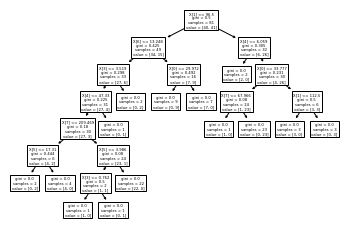

In [27]:
from sklearn import tree
tree.plot_tree(clf)

### 6. Mengevaluasi Model
Memperkirakan seberapa akurat pengklasifikasi atau model dapat memprediksi jenis kultivar. Akurasi dapat dihitung dengan membandingkan nilai set pengujian aktual dan nilai prediksi.

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred))

Accuracy: 0.7714285714285715


### 7. Memvisualisasikan Decision Tree Classifier

In [29]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,  
                     class_names=['1','2'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  


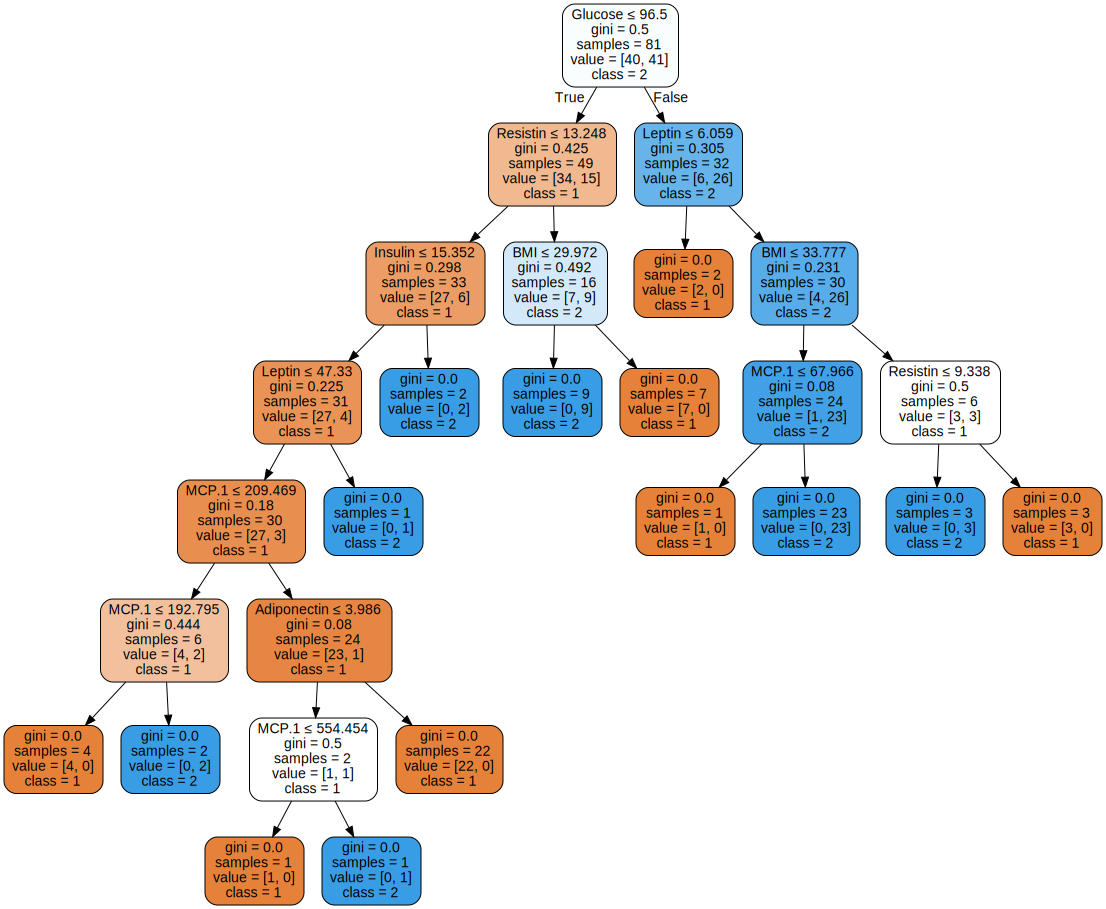

In [18]:
graph 

### 8. Mengoptimalkan Kinerja Pohon Keputusan

Accuracy: 0.6285714285714286


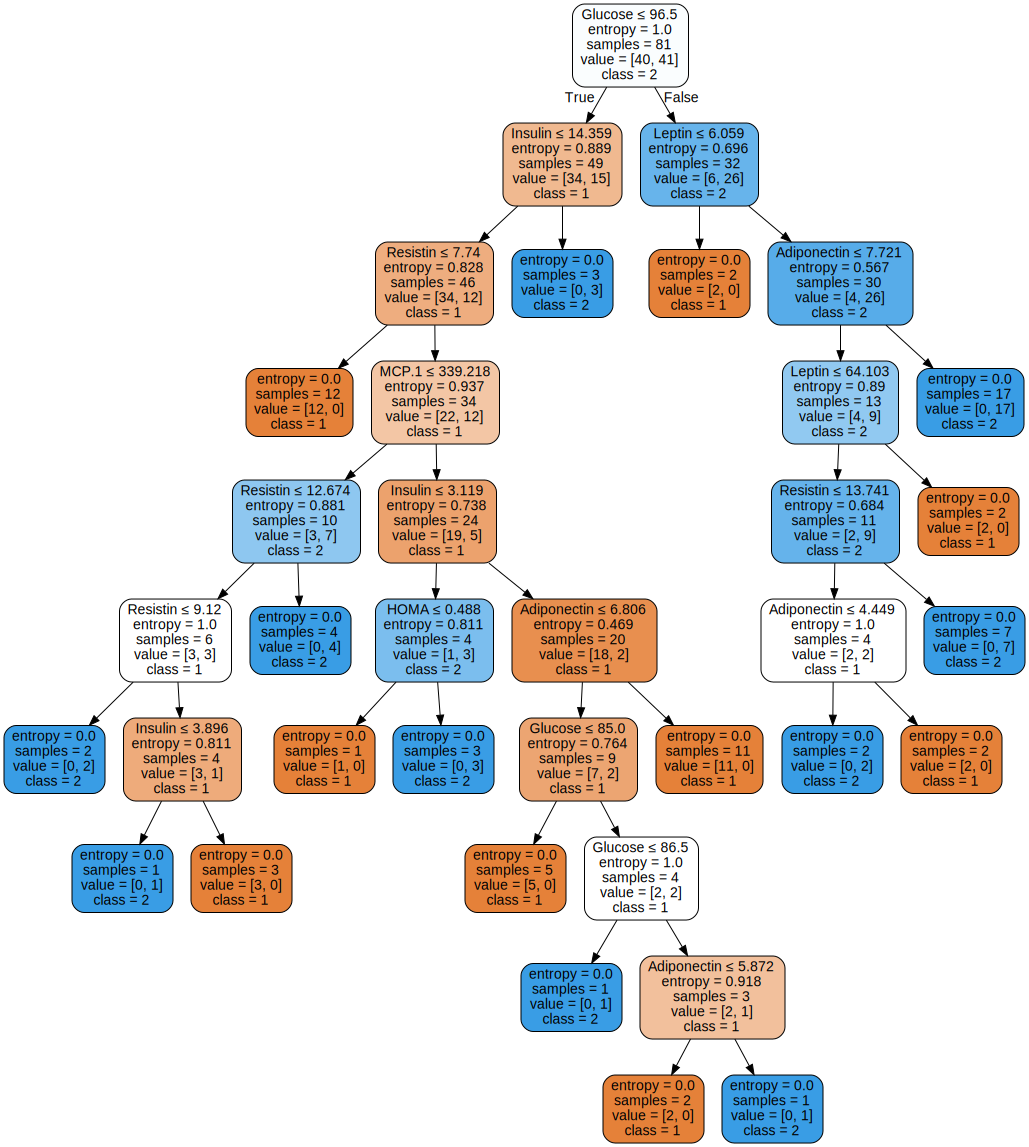

In [33]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(features_train,target_train)

#Predict the response for test dataset
target_pred = clf.predict(features_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred))

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_cols,  
                     class_names=['1','2'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 